In [64]:
#imports
from __future__ import division
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import pylab as pl
import numpy as np
%matplotlib inline
matplotlib.style.use('ggplot')

# Data Import

In [163]:
#Read in data from source 
df_raw = pd.read_table("assets/auto-mpg2.data", delim_whitespace=True)
df_raw.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,car_name
0,18,8,307,130.0,3504,12.0,70,1,chevrolet chevelle malibu
1,15,8,350,165.0,3693,11.5,70,1,buick skylark 320
2,18,8,318,150.0,3436,11.0,70,1,plymouth satellite
3,16,8,304,150.0,3433,12.0,70,1,amc rebel sst
4,17,8,302,140.0,3449,10.5,70,1,ford torino


# Data Clean-up and Conversion

In [164]:
# converting horsepower from string to numeric
df_raw.horsepower=pd.to_numeric(df_raw.horsepower, errors='coerce')

In [165]:
# missing data for horsepower
df_raw.count()

mpg             398
cylinders       398
displacement    398
horsepower      392
weight          398
acceleration    398
model_year      398
origin          398
car_name        398
dtype: int64

In [166]:
# filling missing horsepower data elements using median and not mean because of multiple outliers 
df_raw=df_raw.fillna(df_raw.median())

In [167]:
# demonstrate that missing values are filled
df_raw.count()

mpg             398
cylinders       398
displacement    398
horsepower      398
weight          398
acceleration    398
model_year      398
origin          398
car_name        398
dtype: int64

In [173]:
# create final dataframe after clen up and confirm no issues with missing data
df=df_raw.dropna()
print(df.count())

mpg             398
cylinders       398
displacement    398
horsepower      398
weight          398
acceleration    398
model_year      398
origin          398
car_name        398
dtype: int64


# Data Statistics

In [174]:
df.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,104.304020,2970.424623,15.568090,76.010050,1.572864
std,7.815984,1.701004,104.269838,38.222625,846.841774,2.757689,3.697627,0.802055
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,104.250000,76.000000,2223.750000,13.825000,73.000000,1.000000
50%,23.000000,4.000000,148.500000,93.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,262.000000,125.000000,3608.000000,17.175000,79.000000,2.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000,3.000000


In [175]:
# create a correlation matrix for the data
df.corr()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
mpg,1.000000,-0.775396,-0.804203,-0.773453,-0.831741,0.420289,0.579267,0.563450
cylinders,-0.775396,1.000000,0.950721,0.841284,0.896017,-0.505419,-0.348746,-0.562543
displacement,-0.804203,0.950721,1.000000,0.895778,0.932824,-0.543684,-0.370164,-0.609409
horsepower,-0.773453,0.841284,0.895778,1.000000,0.862442,-0.686590,-0.413733,-0.452096
weight,-0.831741,0.896017,0.932824,0.862442,1.000000,-0.417457,-0.306564,-0.581024
acceleration,0.420289,-0.505419,-0.543684,-0.686590,-0.417457,1.000000,0.288137,0.205873
model_year,0.579267,-0.348746,-0.370164,-0.413733,-0.306564,0.288137,1.000000,0.180662
origin,0.563450,-0.562543,-0.609409,-0.452096,-0.581024,0.205873,0.180662,1.000000


In [178]:
df.corr()["mpg"]

mpg             1.000000
cylinders      -0.775396
displacement   -0.804203
horsepower     -0.773453
weight         -0.831741
acceleration    0.420289
model_year      0.579267
origin          0.563450
Name: mpg, dtype: float64

# Visuals

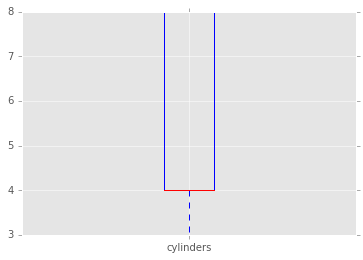

In [83]:
#boxplot cylinders
df['cylinders'].plot(kind='box')

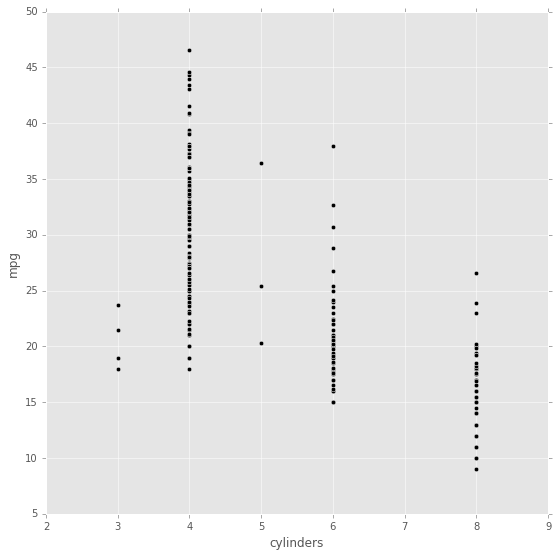

In [49]:
#scatterplot cylinders
df.plot(kind="scatter", x="cylinders", y="mpg", figsize=(9,9), color="black")

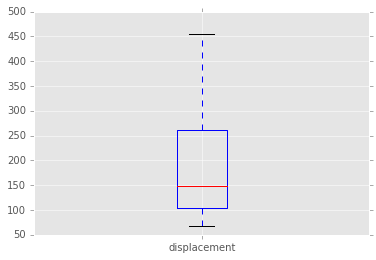

In [50]:
#boxplot displacement
df['displacement'].plot(kind='box')

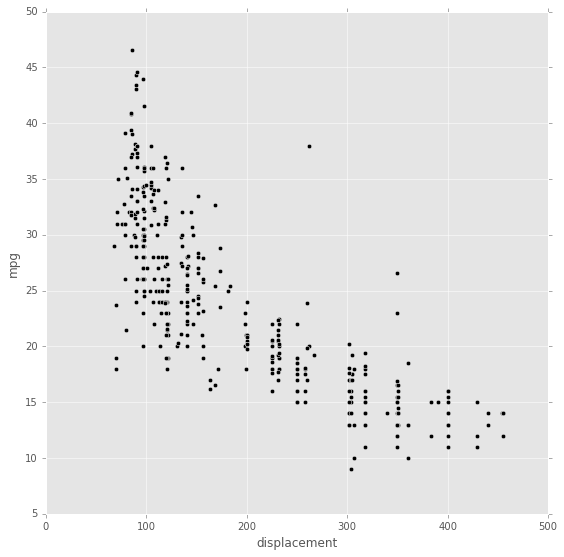

In [51]:
#scatterplot displacement
df.plot(kind="scatter", x="displacement", y="mpg", figsize=(9,9), color="black")

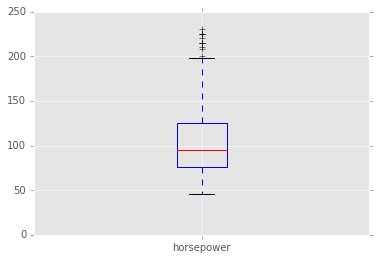

In [170]:
#boxplot horsepower
df['horsepower'].plot(kind='box')

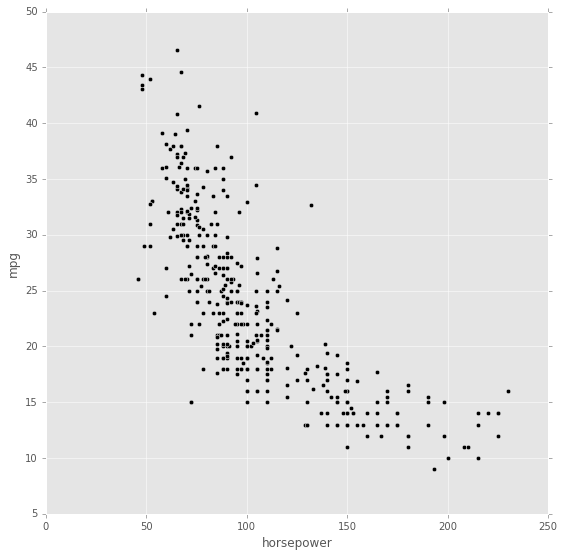

In [171]:
#scatterplot horsepower
df.plot(kind="scatter", x="horsepower", y="mpg", figsize=(9,9), color="black")

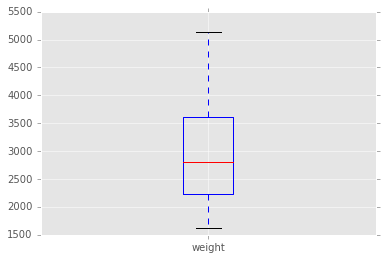

In [52]:
#boxplot weight
df['weight'].plot(kind='box')

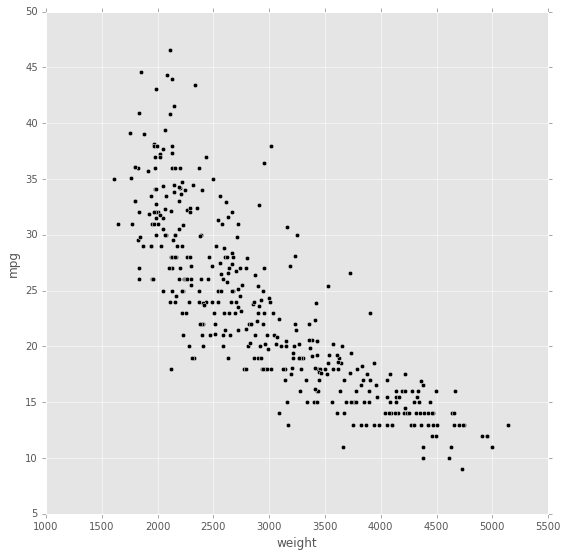

In [53]:
#scatterplot weight
df.plot(kind="scatter", x="weight", y="mpg", figsize=(9,9), color="black")

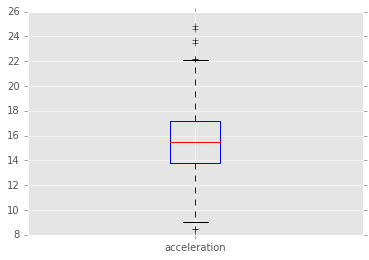

In [54]:
#boxplot acceleration
df['acceleration'].plot(kind='box')

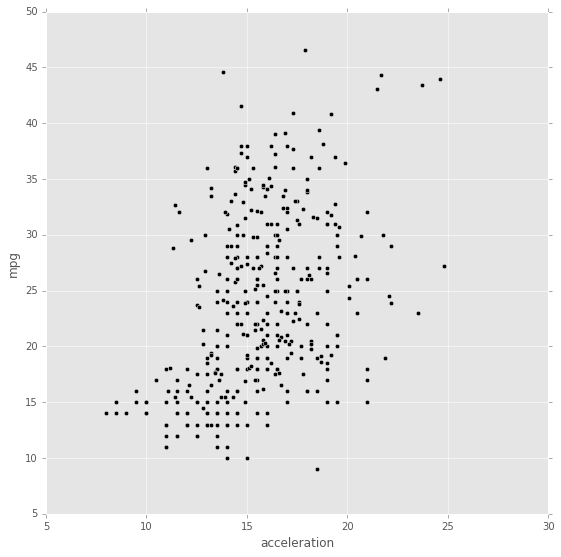

In [55]:
#scatterplot acceleration
df.plot(kind="scatter", x="acceleration", y="mpg", figsize=(9,9), color="black")

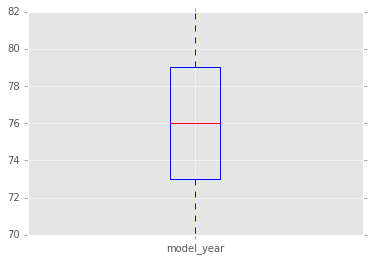

In [172]:
#boxplot model_year
df['model_year'].plot(kind='box')

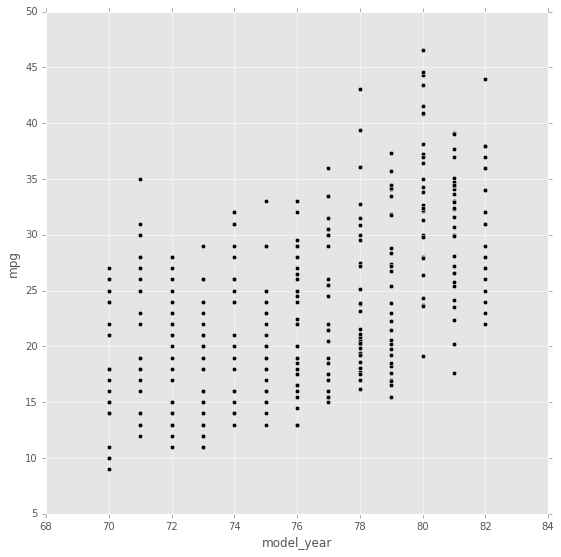

In [56]:
#scatterplot model_year
df.plot(kind="scatter", x="model_year", y="mpg", figsize=(9,9), color="black")

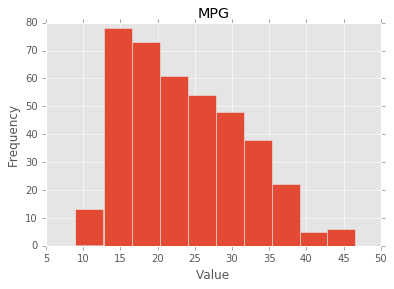

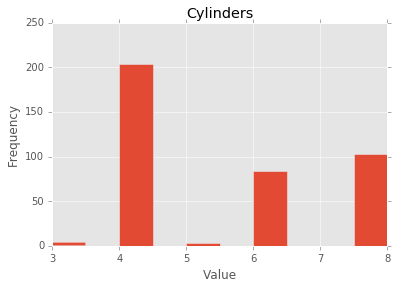

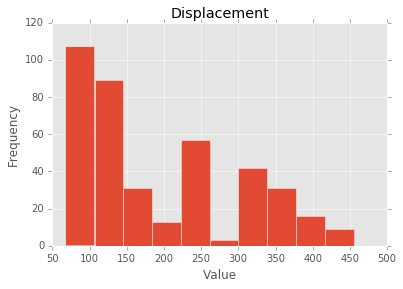

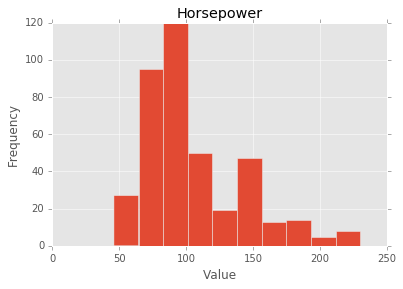

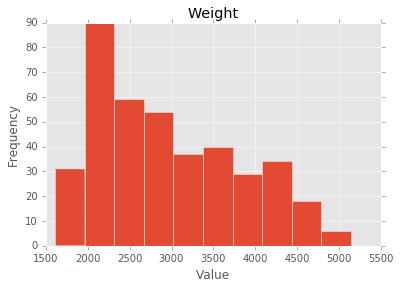

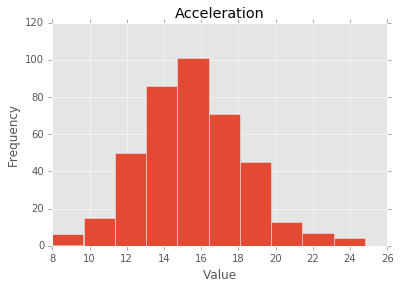

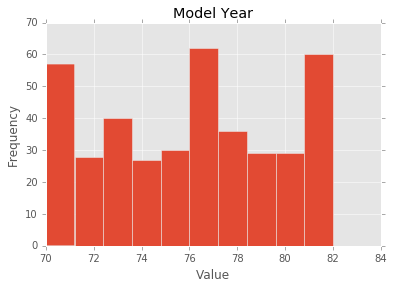

In [156]:
# plot the distribution of each variable
df.mpg.hist()
plt.title("MPG")
plt.xlabel("Value")
plt.ylabel("Frequency")
pl.show()

df.cylinders.hist()
plt.title("Cylinders")
plt.xlabel("Value")
plt.ylabel("Frequency")
pl.show()

df.displacement.hist()
plt.title("Displacement")
plt.xlabel("Value")
plt.ylabel("Frequency")
pl.show()

df.horsepower.hist()
plt.title("Horsepower")
plt.xlabel("Value")
plt.ylabel("Frequency")
pl.show()

df.weight.hist()
plt.title("Weight")
plt.xlabel("Value")
plt.ylabel("Frequency")
pl.show()

df.acceleration.hist()
plt.title("Acceleration")
plt.xlabel("Value")
plt.ylabel("Frequency")
pl.show()

df.model_year.hist()
plt.title("Model Year")
plt.xlabel("Value")
plt.ylabel("Frequency")
pl.show()

# Data Insights

* Data is suited for linear regression
  Because four (4) independent variables (cylinders, displacement, horsepower, weight) are so       correlated, simple linear regression will be used to test each one for best fit before moving to multiple regression.
  Horsepower and acceleration have outliers and the proper approach to handle them will be decided after the simple linear regression trials are complete and evaluated on whether the outliers are affecting the model.
  In addition to linear regression, the following approaches will be tried depending on time:
  k-Nearest Neighbors classification and k-Means clustering.